# Бойко Виктория Владимировна
Лабораторная работа № 4. «Интерполирование и интегрирование»

№ 3

In [5]:
import numpy as np
import matplotlib.pyplot as plt

1. Используя интерполяционную формулу Лагранжа для неравноотстоящих узлов

* построить многочлен Лагранжа (вывести формулу)
* вывести график многочлена Лагранжа на заданном промежутке
* вычислить значения функции при данных значениях аргумента
* отметить на графике (разными цветами) узлы интерполяции, а также предсказанные значения функции.

В работе должна обязательно присутствовать теоретическая часть, формулы для нахождения многочлена Лагранжа должны быть записаны Latex-формулами.

Функция задана таблицей:
\begin{array}{ccccccc}
\hline
x & 0.02 & 0.08 & 0.12 & 0.17 & 0.23 & 0.30 \\
\hline
y & 1.02316 & 1.09590 & 1.14725 & 1.21483 & 1.30120 & 1.40976 \\
\hline
\end{array}

Построить многочлен Лагранжа. Вычислить значение функции в точках:
\begin{array}{cccccc}
\hline
x & 0.102 & 0.114 & 0.125 & 0.203 & 0.154 \\
\hline
\end{array}

#### ТЕОРИЯ

Интерполяционный многочлен Лагранжа используется для нахождения многочлена наименьшей степени, который проходит через заданные точки $(x_i, y_i)$, где $i = 0, 1, \dots, n$. Для неравноотстоящих узлов формула Лагранжа имеет вид:

$$
L(x) = \sum_{i=0}^{n} y_i \cdot \ell_i(x),
$$

где $\ell_i(x)$ — базисные полиномы Лагранжа, определяемые по формуле:

$$
\ell_i(x) = \prod_{\substack{j=0 \\ j \neq i}}^{n} \frac{x - x_j}{x_i - x_j}.
$$

Таким образом, интерполяционный многочлен Лагранжа можно записать в развернутом виде:

$$
L(x) = y_0 \cdot \frac{(x - x_1)(x - x_2) \dots (x - x_n)}{(x_0 - x_1)(x_0 - x_2) \dots (x_0 - x_n)} + y_1 \cdot \frac{(x - x_0)(x - x_2) \dots (x - x_n)}{(x_1 - x_0)(x_1 - x_2) \dots (x_1 - x_n)} + \dots + y_n \cdot \frac{(x - x_0)(x - x_1) \dots (x - x_{n-1})}{(x_n - x_0)(x_n - x_1) \dots (x_n - x_{n-1})}.
$$


Обозначим узлы как $x_0 = 0.02$, $x_1 = 0.08$, $x_2 = 0.12$, $x_3 = 0.17$, $x_4 = 0.23$, $x_5 = 0.30$ и соответствующие значения функции $y_0, y_1, \dots, y_5$.

Тогда интерполяционный многочлен Лагранжа будет иметь вид:

$$
L(x) = y_0 \cdot \ell_0(x) + y_1 \cdot \ell_1(x) + y_2 \cdot \ell_2(x) + y_3 \cdot \ell_3(x) + y_4 \cdot \ell_4(x) + y_5 \cdot \ell_5(x),
$$

где:

$$
\ell_0(x) = \frac{(x - x_1)(x - x_2)(x - x_3)(x - x_4)(x - x_5)}{(x_0 - x_1)(x_0 - x_2)(x_0 - x_3)(x_0 - x_4)(x_0 - x_5)},          \ell_1(x) = \frac{(x - x_0)(x - x_2)(x - x_3)(x - x_4)(x - x_5)}{(x_1 - x_0)(x_1 - x_2)(x_1 - x_3)(x_1 - x_4)(x_1 - x_5)},
$$

и так далее для остальных $\ell_i(x)$.

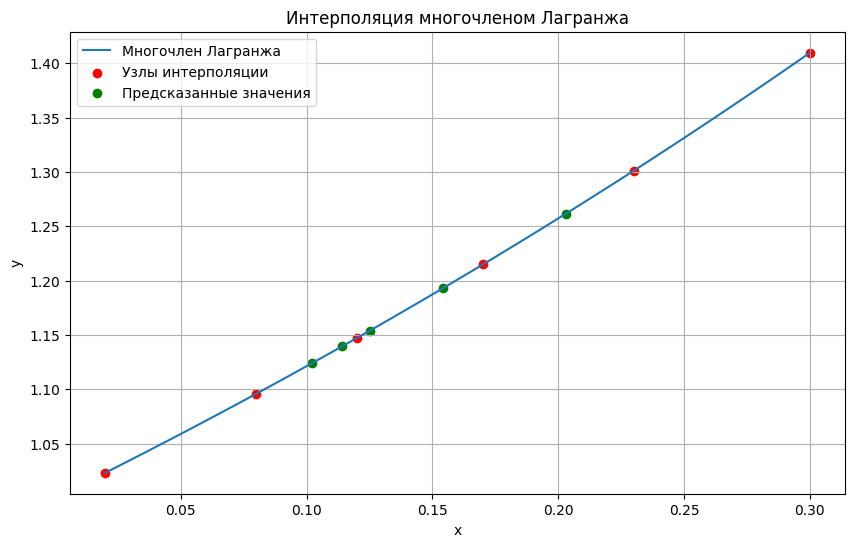

In [6]:
# Узлы интерполяции
x_nodes = np.array([0.02, 0.08, 0.12, 0.17, 0.23, 0.30])
y_nodes = np.array([1.02316, 1.09590, 1.14725, 1.21483, 1.30120, 1.40976])

# Точки для предсказания
x_pred = np.array([0.102, 0.114, 0.125, 0.203, 0.154])

def lagrange(x, x_nodes, y_nodes):
    n = len(x_nodes)
    L = 0.0
    for i in range(n):
        term = y_nodes[i]
        for j in range(n):
            if j != i:
                term *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        L += term
    return L

# Построение графика
x_plot = np.linspace(0.02, 0.30, 100)
y_plot = [lagrange(x, x_nodes, y_nodes) for x in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Многочлен Лагранжа')
plt.scatter(x_nodes, y_nodes, color='red', label='Узлы интерполяции')
plt.scatter(x_pred, [lagrange(x, x_nodes, y_nodes) for x in x_pred], color='green', label='Предсказанные значения')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.title('Интерполяция многочленом Лагранжа')
plt.show()

2. Для вычисления шага воспользуйтесь формулой
$$
M \frac{|b - a| h^{2}}{12} < \epsilon, \quad M = \max \left| f''(x) \right|, \quad x \in [a, b].
$$

Шаг h следует выбирать с учетом дополнительного условия: отрезок
интегрирования должен разбиваться на число частей, кратное 4. Вычисления
шага h должны присутствовать в лабораторной работе, в текстовом блоке.
Текстовый блок поддерживает Latex‒формулы.

Вычислите интеграл по формуле Симпсона с шагами 2h и h:

$$\int_{a}^{b} f(x) dx \approx \frac{h}{3} (y_0 + y_{2m} + 4(y_1 + y_3 + \dots + y_{2m-1}) + 2(y_2 + y_4 + \dots + y_{2m-2}))$$
где $$y_i = f(x_i)$$

Дайте уточненную оценку погрешности по правилу Рунге для формулы
Симпсона: 
$$\Delta \approx \frac{1}{15} |I_n - I_{2n}|$$

Вычислите определенный интеграл по формуле Ньютона-Лейбница.
(вычисления должны присутствовать в текстовом блоке). Сравните
приближенные значения интеграла с точным.

\begin{array}{ccc}
\hline
№Варианта & Функция & a & b \\
\hline
3 & xarctg(x) & 0 & 1 \\
\hline
\end{array}

In [7]:
def f(x):
    return x * np.arctan(x)

def exact_integral(a, b):
    return 0.5 * ((b**2 + 1) * np.arctan(b) - b) - 0.5 * ((a**2 + 1) * np.arctan(a) - a)

def simpson_integral(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    integral = h / 3 * (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-1:2]))
    return integral

#### Поиск второй производной функции $f(x) = x \cdot arctg(x)$.

1. Находим первую производную.
$$
f'(x) = \frac{d}{dx}\left(x\right) \cdot arctg(x) + x \cdot \frac{d}{dx}\left(arctg(x)\right)
$$
$$
\frac{d}{dx}\left(x\right) = 1, \quad \frac{d}{dx}\left(arctg(x)\right) = \frac{1}{1 + x^2}
$$
$$
f'(x) = arctg(x) + \frac{x}{1 + x^2}
$$

2. Находим вторую производную.
$$
f''(x) = \frac{d}{dx}\left(arctg(x)\right) + \frac{d}{dx}\left(\frac{x}{1 + x^2}\right)
$$
$$
\frac{d}{dx}\left(arctg(x)\right) = \frac{1}{1 + x^2}
$$
$$
\frac{d}{dx}\left(\frac{x}{1 + x^2}\right) = \frac{(1) \cdot (1 + x^2) - x \cdot (2x)}{(1 + x^2)^2} = \frac{1 - x^2}{(1 + x^2)^2}
$$
$$
f''(x) = \frac{1}{1 + x^2} + \frac{1 - x^2}{(1 + x^2)^2} = \frac{2}{(1 + x^2)^2}
$$


#### Вычисление шага ( $h^2$ ) из заданного неравенства:

1. Исходное неравенство для оценки погрешности:
$$
M \frac{|b - a| h^{2}}{12} < \epsilon
$$

2. Выражаем ( $h^2$ ):
$$
h^{2} < \frac{12 \epsilon}{M |b - a|}
$$

3. Извлекаем квадратный корень для нахождения \( h \):
$$
h < \sqrt{\frac{12 \epsilon}{M |b - a|}}
$$

4. Окончательная формула для вычисления шага:
$$
h = \sqrt{\frac{12 \epsilon}{M (b - a)}}
$$

Где:
- $\quad M = \max \left| f''(x) \right|$ - максимум второй производной на отрезке \([a, b]\)
- $\epsilon$ - требуемая точность вычислений
- $ |b - a|$ - длина интервала интегрирования

In [8]:
a, b = 0, 1
epsilon = 1e-3
M = 2  # максимум второй производной

h = np.sqrt(12 * epsilon / (M * (b - a)))
h = h / 2  # для выполнения условия кратности 4
n = int((b - a) / h)
n = n if n % 2 == 0 else n + 1  #четное количество интервалов
h = (b - a) / n

print(f"Вычисленный шаг h: {h:.6f}, количество интервалов n: {n}")


I_n = simpson_integral(a, b, n)
I_2n = simpson_integral(a, b, 2 * n)

error_estimate = np.abs(I_n - I_2n) / 15

exact = exact_integral(a, b)


print(f"Приближенное значение интеграла (h={h:.6f}): {I_n:.8f}")
print(f"Приближенное значение интеграла (h={h/2:.6f}): {I_2n:.8f}")
print(f"Оценка погрешности: {error_estimate:.2e}")
print(f"Точное значение интеграла: {exact:.8f}")
print(f"Разница с точным значением: {np.abs(I_n - exact):.2e}")

Вычисленный шаг h: 0.038462, количество интервалов n: 26
Приближенное значение интеграла (h=0.038462): 0.28539815
Приближенное значение интеграла (h=0.019231): 0.28539816
Оценка погрешности: 7.59e-10
Точное значение интеграла: 0.28539816
Разница с точным значением: 1.22e-08
